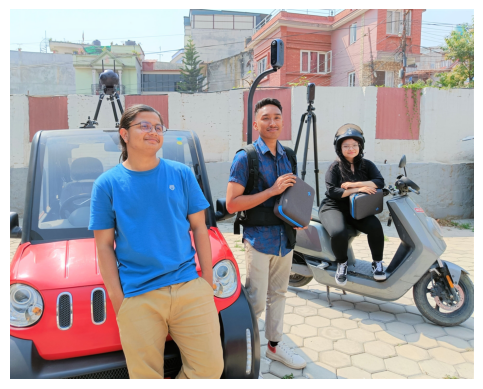

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

img = cv2.imread("image.jpg")

# swap colour channels so that it is displayed correctly
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# display image
plt.axis('off')
plt.imshow(img2);

# split into channels
r, g, b = cv2.split(img2)

# reformat pixel colours into 1xn array
r = np.array(r.flatten())
g = np.array(g.flatten())
b = np.array(b.flatten())


In [9]:
# euclidean distance
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2 )

In [10]:
# number of clusters/centroids
k = 4

# random initial starting points within range 0, 255
centroids = np.array([ [ random.randint(0, 255),
                         random.randint(0, 255),
                         random.randint(0, 255) ] for i in range(k)])

# number of pixels in the image
pixels = len(r)

# exit conditions - stop repeating when max iterations have been reached
# or the centroids stop moving
max_iter = 8
moved = True

In [ ]:
iter = 0 

while moved and iter <= max_iter:
    iter += 1

    # cluster assignments, placeholder array
    assignment = [0]*pixels

    # for each pixel
    for i in range(pixels):

        # compute distance between each pixel and each centroid
        distances = [0]*k
        for j in range(k):
            distances[j] = dist(centroids[j], [r[i], g[i], b[i]] )

         # find minimum distance, returns index (0, .., k-1) of nearest centroid
        nearest = np.argmin(distances)

        # will look something like:
        #     [0, 0, 1, 0, 1, 2, 2, 0, ...]
        # with a centroid value assigned to each pixel
        assignment[i] = nearest

    prev_centroids= centroids.copy()

    # for each cluster, calculate mean of allocated points for each dimension
    for i in range(k):

        # list of array indices of pixels that belong to each cluster
        ind = [j for j in range(pixels) if assignment[j] == i ]

        # check cluster assignment is not empty
        # prevents divide by zero error when calculating mean
        if len(ind) != 0:
            centroids[i][0] = np.mean(r[ind])
            centroids[i][1] = np.mean(g[ind])
            centroids[i][2] = np.mean(b[ind])
        else: 
            centroids[i][0] = 0
            centroids[i][1] = 0
            centroids[i][2] = 0

    # check if centroids have moved
    if np.array_equal(centroids, prev_centroids):
        moved = False

In [ ]:
# make copy of colour channels
r_copy = np.array(r.copy())
g_copy = np.array(g.copy())
b_copy = np.array(b.copy())

# update pixels to be the colour of their cluster
for i in range(k):
    ind = [j for j in range(pixels) if assignment[j] == i ]

    r_copy[ind] = centroids[i][0]
    g_copy[ind] = centroids[i][1]
    b_copy[ind] = centroids[i][2]

# compile channels
img2 = np.array([r_copy, g_copy, b_copy])

# transpose to group values into pixels
img2 = img2.transpose()

# reshape list of pixels into height x widgh x channels
img2 = img2.reshape(img.shape)

plt.axis('off')
plt.imshow(img2)

plt.savefig("image(k4).png", format="png", dpi=600)